In [1]:
import os
import pandas as pd
import numpy as np

case = "woRHC"
limit = "upper"

def get_xs_array(x):
    gu, gzp = x
    xs_folder = os.path.join(os.path.dirname(os.getcwd()), "01_signal_production", "xs_13TeV", case, f"zp_{limit}_limit", "total_tau_tau")
    mass_step = 125 # GeV
    # Leptoquark parameters
    M_U = np.arange(1000, 3500 + mass_step, mass_step)

    xs_matrix = pd.read_csv(os.path.join(xs_folder, f"XS_matrix_{gu}.csv"), index_col=0)
    xs_matrix.keys()
    xs_matrix.index
    return M_U, np.array([xs_matrix[f"{m}"][gzp] for m in M_U])


In [2]:
colors = ['blue', 'orange', 'green', 'red', 'purple']

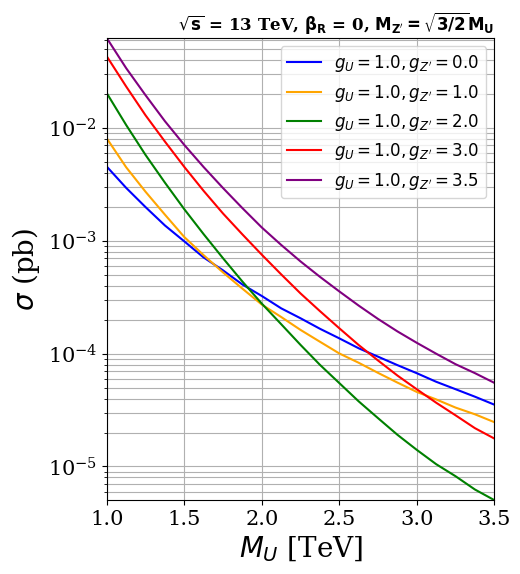

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

from itertools import product
limit = "upper"
g_U = [1.0]
g_zp = [
    0.0,
    1.0,
    2.0,
    3.0,
    3.5
    ]
g_list = list(product(g_U, g_zp))

fig = plt.figure(figsize = (5,6))

for n, g_pair in enumerate(g_list):
    M_U, xs_array = get_xs_array(g_pair)
    plt.semilogy(M_U/1000, xs_array, label= r"$g_{U}" + f"={g_pair[0]}, " + r"g_{Z'} " + f"={g_pair[1]}$", color = colors[n]) # Linear X axis, Logarithmic Y axis
    
# plt.xlabel(r'$m(LQ)$ [TeV]', loc= 'right', fontsize = 20)
plt.xlabel(r"$M_{U}$ [TeV]", fontsize = 20)

plt.ylabel(r'$\sigma $ (pb)', fontsize = 20)

# add grid
plt.grid(True, which="both")

# set y lims
ymin = min([min(get_xs_array(g)[1]) for g in g_list])
ymax = max([max(get_xs_array(g)[1]) for g in g_list])
plt.ylim(ymin, ymax)
# set x lims
xmin = 1.000
xmax = 3.500
plt.xlim(xmin, xmax)
# add title, latex format
if limit == "upper":
    plt.title(r"$\mathbf{\sqrt{s}}$ = 13 TeV, $\mathbf{\beta_{R}}$ = 0, $\mathbf{M_{Z'} = \sqrt{3/2} M_{U}}$", loc = 'right', fontsize = 12, fontweight="bold")
    # plt.title(r"$\mathbf{\sqrt{s} = 13 TeV, \beta_{R} = 0, m(Z') = \sqrt{3/2} m(LQ)}$", loc = 'right', fontsize = 12)
    
elif limit == "lower":
    plt.title(r"$\mathbf{\sqrt{s}}$ = 13 TeV, $\mathbf{\beta_{R}}$ = 0, $\mathbf{M_{Z'} = \sqrt{1/2} M_{U}}$", loc = 'right', fontsize = 12, fontweight="bold")
    # plt.title(r"$\mathbf{\sqrt{s} = 13 TeV, \beta_{R} = 0, m(Z') = \sqrt{1/2} m(LQ)}$", loc = 'right', fontsize = 12)

# add legend
plt.legend(fontsize = 12)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.savefig('XS_gu_gzp_upper_limit_woRHC.pdf', bbox_inches='tight')

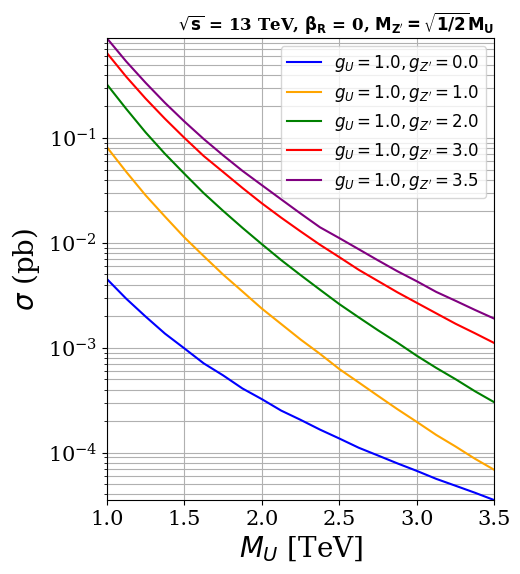

In [4]:
fig = plt.figure(figsize = (5,6))

limit = "lower"

for n, g_pair in enumerate(g_list):
    M_U, xs_array = get_xs_array(g_pair)
    plt.semilogy(M_U/1000, xs_array, label= r"$g_{U}" + f"={g_pair[0]}, " + r"g_{Z'} " + f"={g_pair[1]}$", color = colors[n])
    
# plt.xlabel(r'$m(LQ)$ [TeV]', loc= 'right', fontsize = 20)
plt.xlabel(r"$M_{U}$ [TeV]", fontsize = 20)
plt.ylabel(r'$\sigma $ (pb)', fontsize = 20)

# add grid
plt.grid(True, which="both")
# set y lims
ymin = min([min(get_xs_array(g)[1]) for g in g_list])
ymax = max([max(get_xs_array(g)[1]) for g in g_list])
plt.ylim(ymin, ymax)
# set x lims
xmin = 1.000
xmax = 3.500
plt.xlim(xmin, xmax)
# add title, latex format
if limit == "upper":
    plt.title(r"$\mathbf{\sqrt{s}}$ = 13 TeV, $\mathbf{\beta_{R}}$ = 0, $\mathbf{M_{Z'} = \sqrt{3/2} M_{U}}$", loc = 'right', fontsize = 12, fontweight="bold")
    # plt.title(r"$\mathbf{\sqrt{s} = 13 TeV, \beta_{R} = 0, m(Z') = \sqrt{3/2} m(LQ)}$", loc = 'right', fontsize = 12)
    
elif limit == "lower":
    plt.title(r"$\mathbf{\sqrt{s}}$ = 13 TeV, $\mathbf{\beta_{R}}$ = 0, $\mathbf{M_{Z'} = \sqrt{1/2} M_{U}}$", loc = 'right', fontsize = 12, fontweight="bold")
    # plt.title(r"$\mathbf{\sqrt{s} = 13 TeV, \beta_{R} = 0, m(Z') = \sqrt{1/2} m(LQ)}$", loc = 'right', fontsize = 12)

# add legend
plt.legend(fontsize = 12)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.savefig('XS_gu_gzp_lower_limit_woRHC.pdf', bbox_inches='tight')